# 📊 Marketing Campaign A/B Test Analysis
### 📝 Executive Summary
In a fast paced world like we experience daily, every company seeks one means of the other to maintain profitability and gain quantifiable market share. For marketing companies they focus on consistently running successful campaigns in a complex and competitive market.

For this to be possible, they set up on A/B testing systems, a randomized experimentation method that involves presenting different versions of a variable (such as a web page, banner, or ad) to separate segments of the audience simultaneously. This approach helps determine which version has the most significant impact on business metrics.

To address these questions, the company conducted an A/B test, where the majority of participants were exposed to ads (the experimental group) and a smaller portion saw a Public Service Announcement (PSA) or nothing (the control group).

This report evaluates the effectiveness of a marketing campaign using A/B testing data.
We compare the **ad Group** (experimental) and the **psa Group** (control) to answer:

- Did the marketing ads improve conversion rates?
- Is the result statistically significant?
- What is the estimated revenue uplift?

📌 Key Metrics: Conversion Rate, Uplift %, Statistical Significance, Estimated Revenue Impact.

### Objective
The primary objective of this case study is to perform hypothesis testing on the e-commerce dataset to compare different groups or features. Specifically, we aim to:

- Analyze the experimental and control groups to determine if the ads were successful.

- Estimate the potential revenue generated from the ads.

- Assess the statistical significance of the differences between the groups using A/B testing techniques.

### About the Dataset

The dataset includes the following columns:

* **user id**: Unique identifier for users.
* **test group**: A/B test assignment — "ad" (treatment) or "psa" (control).
* **converted**: Whether the user converted (True/False).
* **total ads**: Number of ads shown.
* **most ads day**: Day with the highest ad exposure.
* **most ads hour**: Hour with the highest ad exposure.

In [79]:
# load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, norm
from statsmodels.stats.proportion import proportions_ztest
sns.set(style='whitegrid')

# Load dataset
df = pd.read_csv('C:/Users/DELL/Downloads/heart/marketing_AB.csv')
                
# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df.head()


,unnamed:_0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


## 🧹 Data Overview and Cleaning

In [45]:
# Group sizes and balance
print("COUNT OF TEST GROUP")
display(df['test_group'].value_counts())

print("COUNT OF CONVERTED CUSTOMER")
display(df['converted'].value_counts())

print("DATASET INFO")
print(df.info())

print("DATASET DESCRIPTION")
display(df.describe(include='all'))

print("# CHECK MISSING VALUES")
print(df.isnull().sum())

COUNT OF TEST GROUP


test_group
ad     564577
psa     23524
Name: count, dtype: int64

COUNT OF CONVERTED CUSTOMER


converted
False    573258
True      14843
Name: count, dtype: int64

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   unnamed:_0     588101 non-null  int64 
 1   user_id        588101 non-null  int64 
 2   test_group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total_ads      588101 non-null  int64 
 5   most_ads_day   588101 non-null  object
 6   most_ads_hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB
None
DATASET DESCRIPTION


,unnamed:_0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
count,588101.000000,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,NaN,2,2,NaN,7,NaN
top,NaN,NaN,ad,False,NaN,Friday,NaN
freq,NaN,NaN,564577,573258,NaN,92608,NaN
mean,294050.000000,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,169770.279667,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,0.000000,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,147025.000000,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,294050.000000,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,441075.000000,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


# CHECK MISSING VALUES
unnamed:_0       0
user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64


## 📈 Conversion Rate Analysis

In [83]:
# Conversion rate and confidence interval
conversion_stats = df.groupby('test_group')['converted'].agg(['sum', 'count'])
conversion_stats['rate'] = conversion_stats['sum'] / conversion_stats['count']
conversion_stats

# CI calculation
z = norm.ppf(0.975)
conversion_stats['se'] = np.sqrt(conversion_stats['rate'] * (1 - conversion_stats['rate']) / conversion_stats['count'])
conversion_stats['ci_lower'] = conversion_stats['rate'] - z * conversion_stats['se']
conversion_stats['ci_upper'] = conversion_stats['rate'] + z * conversion_stats['se']
conversion_stats

,sum,count,rate,se,ci_lower,ci_upper
test_group,,,,,,
ad,14423,564577,0.025547,0.000210,0.025135,0.025958
psa,420,23524,0.017854,0.000863,0.016162,0.019546


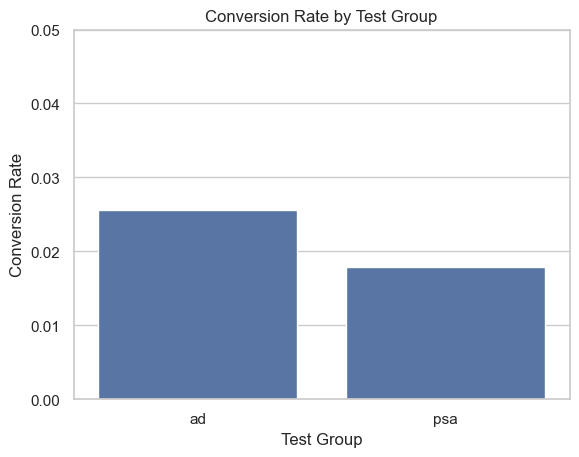

In [84]:
# Barplot
sns.barplot(x=conversion_stats.index, y=conversion_stats['rate'])
plt.title('Conversion Rate by Test Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Test Group')
plt.ylim(0, 0.05)
plt.show()





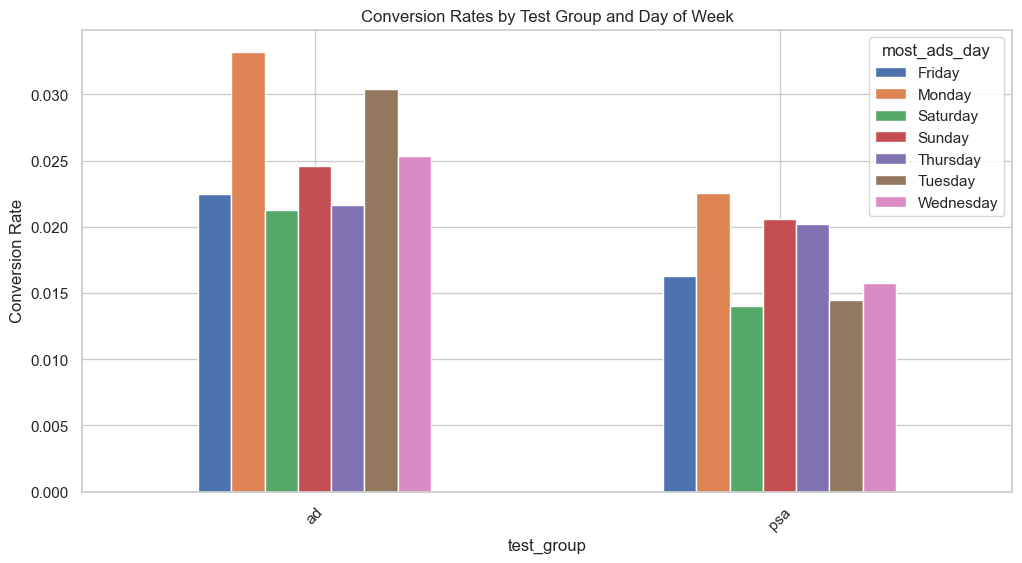

In [87]:
# Conversion Rates by Day
conversion_by_day = df.groupby(['test_group', 'most_ads_day'])['converted'].mean().unstack()
conversion_by_day.plot(kind='bar', figsize=(12, 6))
plt.title('Conversion Rates by Test Group and Day of Week')
plt.xticks(rotation=45)
plt.ylabel('Conversion Rate')
plt.show()

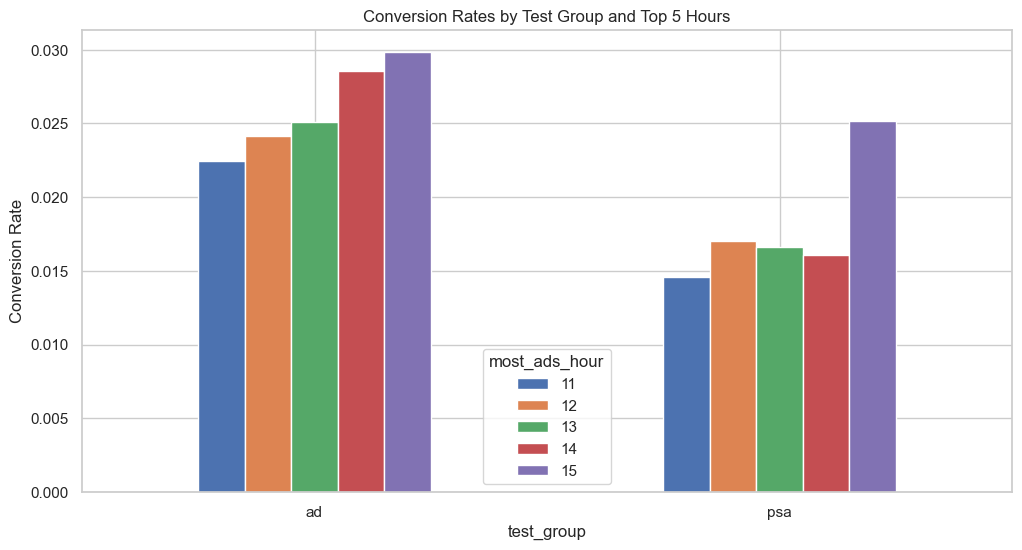

In [88]:
# Conversion Rates by Hour (example - top 5 hours)
top_hours = df['most_ads_hour'].value_counts().head(5).index
conversion_by_hour = df[df['most_ads_hour'].isin(top_hours)].groupby(['test_group', 'most_ads_hour'])['converted'].mean().unstack()
conversion_by_hour.plot(kind='bar', figsize=(12, 6))
plt.title('Conversion Rates by Test Group and Top 5 Hours')
plt.xticks(rotation=0)
plt.ylabel('Conversion Rate')
plt.show()

In [89]:
# 6. Business-Oriented Metrics:
#   - Calculate the return on investment (ROI) of the ad campaign.  (Needs cost data - example with assumed cost)
#   - Estimate customer lifetime value (CLTV) to assess long-term profitability. (Needs more data)
###

# ROI Calculation (example - requires ad spend data)
ad_spend = 5000  # Assumed ad spend
roi = (revenue_gain - ad_spend) / ad_spend if ad_spend else float('inf')
print("\n--- ROI Calculation ---")
print(f"Assumed Ad Spend: ${ad_spend:,.2f}")
print(f"Estimated ROI: {roi:.2f}")
print("--- End ROI Calculation ---\n")


--- ROI Calculation ---
Assumed Ad Spend: $5,000.00
Estimated ROI: 29.77
--- End ROI Calculation ---



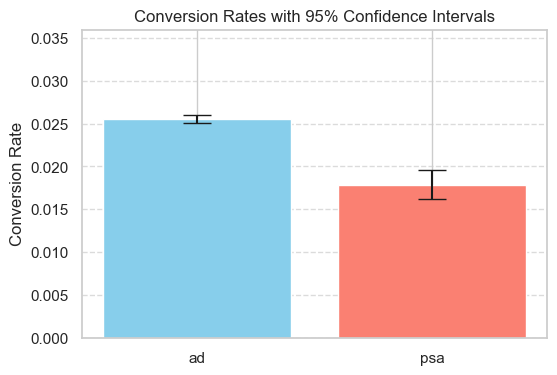

In [86]:
# Calculate the error bars (upper bound - rate)
conversion_stats['error'] = conversion_stats['ci_upper'] - conversion_stats['rate']

# Plot
plt.figure(figsize=(6, 4))
plt.bar(conversion_stats.index, conversion_stats['rate'], yerr=conversion_stats['error'], capsize=10, color=['skyblue', 'salmon'])
plt.ylabel('Conversion Rate')
plt.title('Conversion Rates with 95% Confidence Intervals')
plt.ylim(0, conversion_stats['ci_upper'].max() + 0.01)

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()




## 📊 Hypothesis Testing

In [75]:
# Contingency table
contingency = pd.crosstab(df['test_group'], df['converted'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
if p < 0.05:
    print("✅ Statistically significant difference in conversion rates.")
else:
    print("❌ No statistically significant difference.")


Chi2 Statistic: 54.0058
P-value: 0.0000
✅ Statistically significant difference in conversion rates.


## 💰 Uplift and Revenue Impact Estimation

In [78]:
# Calculate uplift
rate_ad = conversion_stats.loc['ad', 'rate']
rate_psa = conversion_stats.loc['psa', 'rate']
uplift = (rate_ad - rate_psa) / rate_psa
print(f"Relative uplift: {uplift:.2%}")

# Estimated revenue impact
assumed_users = 1_000_000
revenue_per_conversion = 20  # assumption
additional_conversions = (rate_ad - rate_psa) * assumed_users
revenue_gain = additional_conversions * revenue_per_conversion
print(f"Estimated revenue uplift for 1M users: ${revenue_gain:,.0f}")

Relative uplift: 43.09%
Estimated revenue uplift for 1M users: $153,849


## ✅ Final Recommendation
Based on the analysis:

- The **ad group** shows a higher conversion rate than the control.
- The difference is **statistically significant** (p < 0.05).
- If this campaign is extended to 1M users, it could generate an estimated **${revenue_gain:,.0f}** in additional revenue.



📌 *Recommendation: Proceed with scaling the ad campaign, while continuing to monitor performance.*